# Принятие решений в бизнесе на основе данных.Проверка гипотез с целью увеличения выручки для крупного интернет-магазина

# Описание данных


**Данные для первой части**

**Файл `/datasets/hypothesis.csv`** 

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.


**Данные для второй части**

**Файл `/datasets/orders.csv`**

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.



**Файл `/datasets/visitors.csv`**

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста





# Описание проекта

**Контекст**


Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**
- Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.


# Часть 2. Анализ A/B-теста


Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**

Проанализируйте A/B-тест:

- 1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.


- 2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.


- 3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


- 4.Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.


- 5.Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.


- 6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.


- 7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


- 8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


- 9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


- 10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.


- 11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


- 12.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.


- 13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


- 14.Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

## Выгрузка данных и их подготовка к анализу

In [1]:
#импорт библиотек  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import datetime as dt

In [2]:
# отключение уведомлений об ошибке 
import warnings
warnings.filterwarnings('ignore')

# снятие ограничений на ширину и число столбцов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
hypothesis, orders, visitors = (
                            pd.read_csv('/datasets/hypothesis.csv'),
                            pd.read_csv('/datasets/orders.csv'),
                            pd.read_csv('/datasets/visitors.csv')
                            )

### Знакомство с данными

**hypothesis(гипотезы)**

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Таблица hypothesis
- Действительно содержит информацию о 9 различных гипотезах с оценками от 1  до 10 по 4 критериям.
- Пропусков и дубликатов нет,типы данных соответствуют своей природе
- Названия столбцов нужно привести к нижнему регистру в соответствии с общепринятыми нормами


**orders(заказы)**

In [6]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Таблица orders :
- Имнеет 1197 записей о заказах, пропусков нет
- Стоит проверить на дубликаты
- Тип данных в столбце date некорректен.Его следукт привести к формату 'datetime'
- Названия столбцов также нужно привести к общепринятому виду


**visitors(пользователи)**

In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Таблица visitors :
- Содержит 62 записи о распределении пользователей по датам и группам А/В теста, пропксков нет.
- Стоит проверить на дубликаты
- Тип данных в столбце date также некорректен.Его следукт привести к формату 'datetime'


### Предобработка данных

Приведем к нижнему регистру названия столбцов в **hypothesis**.И перереименуем столбцы 'transactionId' и 'visitorId' в **orders**

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [11]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Изменим тип данных в столбцах с датами в **orders** и  **visitors** и заодно посмотрим,за какой период предоставлены нам данные

In [12]:
orders['date'] = pd.to_datetime(orders['date'],format='%Y.%m.%d')

visitors['date'] = pd.to_datetime(visitors['date'],format='%Y.%m.%d')

In [13]:
display(orders['date'].min(),orders['date'].max())
display(visitors['date'].min(),visitors['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Видно, что данные в обоих таблицах представлены за август 2019 года

Проверка на полные дубликаты

In [14]:
#orders.duplicated().sum()

In [15]:
#visitors.duplicated().sum()

In [16]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [17]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

**Проверка на неявные дубликаты**

Посмотрим на уникальные значения `group`  в таблицах **orders** и **visitors**.А также на число уникальных пользователей,сделавших  заказ и сколько в какой группе.

In [18]:

display(orders['group'].unique(),visitors['group'].unique())

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

In [19]:
len(orders['visitor_id'].unique())

1031

In [20]:
group_A = orders.query('group == "A"')
len(group_A['visitor_id'].unique())

503

In [21]:
group_B = orders.query('group == "B"')
len(group_B['visitor_id'].unique())

586

1031 уникальный пользователь распределен по группам A и B.Но если мы сложим пользователей по группам, то получим 503 + 586 = 1089.Получается,что  есть те, кто попал в обе группы

In [22]:
df_dup = group_A.merge(group_B,on = 'visitor_id')
len(df_dup['visitor_id'].unique())

58

Таких пользователей 58.Возможно это произошло из-за технической ошибки.Получается, что мы не можем однозначно оценить действия этих пользователей и это не позволит провести корректный анализ. Следует их исключить из исследования.

In [23]:
list_dup = df_dup['visitor_id'].to_list()
orders = orders[~orders['visitor_id'].isin(list_dup)]
len(orders['visitor_id'].unique())

973

**ВЫВОД**

На этапе знакомства и предобработки данных:

- Выгружены данные и предоставленных трех файлов.Они представляют собой  данные для приоритизации гипотез и результаты проведения А/В теста за период с 01.08.2019 по 31.08.2019.
- в данном случае в А/В тесте две группы- тест парный.Временные рамки теста- календарный месяц

- Пропусков и явных дубликатов в данных не обнаружено.

- Приведены к нижнему регистру названия столбцов в таблице  **hypothesis** и  переименованы столбцы `transactionId` и `visitorId` в таблице **orders** в соответствии с общепринятыми нормаим.

- Изменен  тип данных в столбцах `date`в таблицах **orders** и **visitors**

- Выявлены неявные дубликаты: Обнаружены 58 пользователей относящихся одновременно к группам `A`
  и `B`.Во избежание ошибок в анализе они удалены



## Часть 1. Приоритизация гипотез.

### Применение фреймворка ICE (Impact, Confidence, Effort/ Влияние, Уверенность, Усилия)для приоритизации гипотез.Сортировка их по убыванию приоритета

In [24]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [25]:
hypothesis['ICE'] = ( hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


При при именении фреймворка ICE топ-5 гипотез:
    
   8--	Запустить акцию, дающую скидку на товар в день рождения
    
   0--	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    
   7--	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    
   6--	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
    
   2--	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
   
   На первом месте гипотеза 8-Запустить акцию, дающую скидку на товар в день рождения
    

 ### Применение фреймворка RICE (Reach,Impact, Confidence, Effort/ Охват,Влияние, Уверенность, Усилия) для приоритизации гипотез.Сортировка их по убыванию приоритета

In [26]:
hypothesis['RICE'] = (hypothesis['reach'] *  hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При при именении фреймворка RICE топ-5 гипотез:

7--	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2--	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

0--	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

6--	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

8--	Запустить акцию, дающую скидку на товар в день рождения

На первом месте гипотеза 7 -'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.Величина показателя RICE у нее самая высокая- 112.

### Как изменилась приоритизация гипотез при применении RICE вместо ICE

In [27]:
hypothesis[['hypothesis','reach','ICE','RICE']].sort_values(by='RICE', ascending=False).head(5).round(2)

,hypothesis,reach,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.20,16.2


Видно,что в ТОП-5 гипотез по методам ICE и RICE  входт одинаковые гипотезы, однако при применении параметра Reach(Охват)(т.е.  количество пользователей, которое затронет изменение)приоритет гипотез меняется.Этот параметр при включении в формулу напрямую влияет на изменение приоритизации.
Например,у гипотезы  c индексами 7 и 2 этот параметр имеет значение 10 и 8 соответственно,а гипотеза с инднксом 8 оказалась уже  на пятом месте, потому что у неё значение reach всего 1.
 

**Вывод по Части 1**

В части 1 проекта:

- Изучен файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- При применении фреймворка ICE определены топ-5 гипотез:

    'Запустить акцию, дающую скидку на товар в день рождения'
    
    'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'   
    
     'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    
     'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
    
     'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'          
- При применении фреймворка RICE определены топ-5 гипотез:

     'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
     
     'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
     
     'Добавить два новых канала увеличения трафика, что позволит привлекать на 30% больше пользователей'
     
     'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
     
     'Запустить акцию, дающую скидку на товар в день рождения'
     
      
- Определено, что  при применении RICE вместо ICE на изменение приоритизации существенное влияние оказывает параметр **Reach(Охват)**.Когда мы добавили этот параметр в расчеты,то мы изменили приоритеты: теперь значимость гипотезы зависит не только от  уверенности в гипотезе,влияния на пользователей,затрат ресурсов на проверку гипотезы , а еще и  от количества пользователей, которых затронет изменение.

## Часть 2. Анализ A/B-теста

Чтобы построить графики, нужно собрать кумулятивные данные в датафрейм 

In [28]:
# создаем массив уникальных пар значений дат и групп теста
df_group = orders[['date', 'group']].drop_duplicates()




In [29]:
# получаем агрегированные кумулятивные по дням данные о заказах
orders_agg = df_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}),axis=1).sort_values(by=['date', 'group'])


In [30]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_agg = df_group.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [31]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
df_cumulative = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
df_cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

df_cumulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


`date` — дата;

`group` — группа A/B-теста (A или B);

`orders` — кумулятивное количество заказов на указанную дату в указанной группе;

`buyers` — кумулятивноое количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

`revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);

### График кумулятивной выручки по группам

In [32]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cum_revenueA = df_cumulative[df_cumulative['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cum_revenueB = df_cumulative[df_cumulative['group']=='B'][['date','revenue', 'orders']]



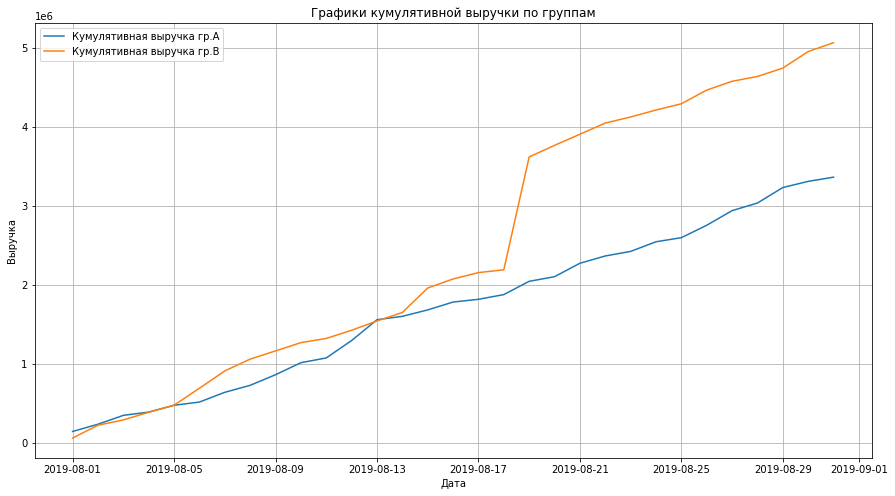

In [33]:
plt.figure(figsize=(15, 8))

# Строим график выручки группы А
plt.plot(cum_revenueA['date'], cum_revenueA['revenue'],label='Кумулятивная выручка гр.A')

# Строим график выручки группы B
plt.plot(cum_revenueB['date'], cum_revenueB['revenue'], label='Кумулятивная выручка гр.B')
plt.title('Графики кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend() ;


**ВЫВОД**

- Выручка вцелом растет равномерно.
- Кумулятивная выручка группы `В` примерно до середины месяца чуть выше, чем в группе `А`.
- Кумулятивная выручка группы `В` в середине месяца начинает расти быстрее чем в группе `А` и наблюдается резкий скачок (примерно  20.08.2018).Возможно этот   скачок обусловлен крупной выручкой в этот день.

###  График кумулятивного среднего чека по группам

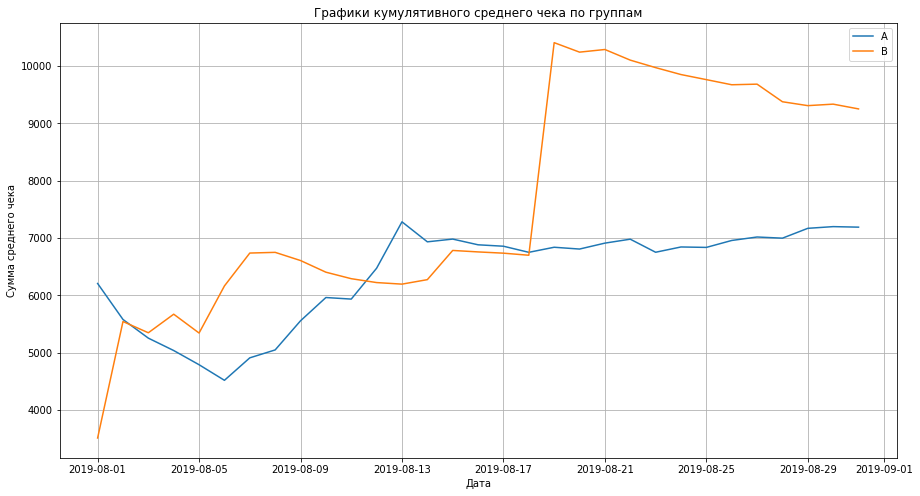

In [34]:
plt.figure(figsize=(15, 8))
plt.plot(cum_revenueA['date'],cum_revenueA['revenue']/cum_revenueA['orders'], label='A')

plt.plot(cum_revenueB['date'],cum_revenueB['revenue']/cum_revenueB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.grid()
plt.legend() ; 

**ВЫВОД**

- Группа `А` -  средний чек в начале периода немного падает, потом происходит резкий скачок,а затем стабилизируется на 7000 и наблюдается небольшая тенденция к росту. 

- Группа `В` - средний чек в группе  растет до середины месяца,в одной точке резко растет(Это та жне дата,что и на графике выручки- 20.08.2019) и возрастает до 10000.Что подтверждает версию о высокоцй выручке в этот дннь.Далее наблюдается тенденция к снижению среднего чека в этой группе до 9000.



### График относительного изменения кумулятивного среднего чека группы B к группе A.

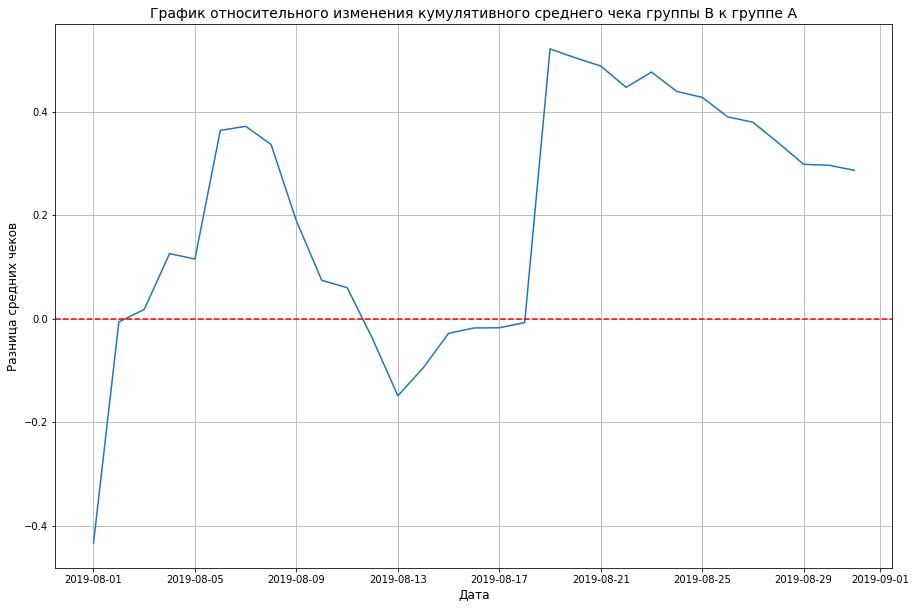

In [35]:
# собираем данные в одном датафрейме
merge_cum = cum_revenueA.merge(cum_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение средних чеков
plt.plot(merge_cum['date'], (merge_cum['revenueB']/merge_cum['ordersB'])/(merge_cum['revenueA']/merge_cum['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')



plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Разница средних чеков', fontsize=12)
plt.grid();


**ВЫВОД**

- График относительного изменения кумулятивного среднего чека группы `B` к группе `A` говорит о том, что результаты группы `B` нестабильны: мы наблюдаем относительный рост суммы кумулятивного чека группы В примерно до 8 августа, его резкий спад к 13 августу ,такой же резкий подъем до 20 августа(как и на предыдущих двух графиках), и снова относительное падение, но не ниже нулевого уровня.Возможно что  в эти даты и были сделаны аномальные заказы.

- Кумулятивная выручка группы `В`  выше, чем у группы `А`, но она нестабильна.

###  График кумулятивного среднего количества заказов на посетителя по группам

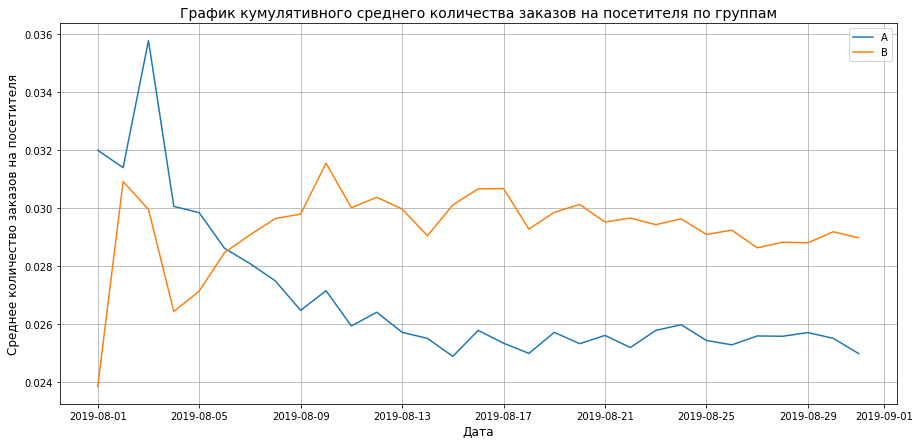

In [36]:
# считаем кумулятивного среднего количество заказов на посетителя  по группам
df_cumulative['conversion'] = df_cumulative['orders']/df_cumulative['visitors']

# отделяем данные по группе A
cum_df_a = df_cumulative[df_cumulative['group']=='A']

# отделяем данные по группе B
cum_df_b = df_cumulative[df_cumulative['group']=='B']

# задаём размер для графиков
plt.figure(figsize=(15,7))

# строим графики
plt.plot(cum_df_a['date'],cum_df_a['conversion'], label='A')
plt.plot(cum_df_b['date'],cum_df_b['conversion'], label='B')

# задаем масштаб осей
#plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]) 

plt.grid(visible=True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=12)
plt.legend()
plt.show()

**ВЫВОД**

Ккмулятивное среднее количество заказов на посетителя первые первые шесть дней было у группы `A`,наблюдался одновременно небольшой всплеск значений.Затем к началу второй недели месяца показатели для групп `A` и `B` выровнялись.Далее у группы `B` произошел рост и показатели выровнялись и в итоге установились примерно для группы `B` на уровне 0,03, а для группы `A` чуть ниже- 0.026

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

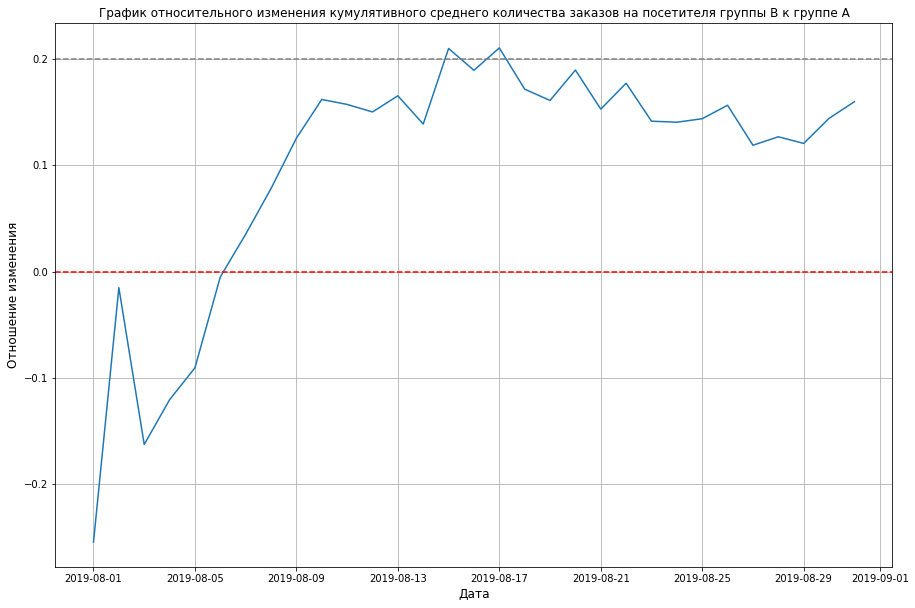

In [37]:
merge_cum1 = cum_df_a[['date','conversion']].merge(cum_df_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# задаём размер для графика
plt.figure(figsize=(15, 10))
plt.plot(merge_cum1['date'],merge_cum1['conversionB']/merge_cum1['conversionA']-1)


plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')


plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение изменения', fontsize=12)

plt.grid();

**ВЫВОД**


- Здесь мы также видим, что до 6 августа изменение кумулятивного среднего количества заказов на посетителя группы `B` к группе `A` отрицательно, то есть лидирует группа `А`.Наблюдается стремительный рост показателя у группы `В`; И после 20 августа идет снижение показателей у группы  `В` относительно группы `А` , но среднем прирост не падет ниже 10%.

- Стоит отметить,что тендеции для группы В схожи с теми,что наблюдались на предыдущих куммулятивных граф

### Точечный график количества заказов по пользователям

Изучим аномалии, которые могут искажать результаты A/B-теста. Подсчитаем количество заказов по пользователям.

In [38]:
# число заказов(транзакций) по пользователям
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique}) 
                                                                       
orders_by_users.columns = ['user_id','orders']

orders_by_users.sort_values(by='orders',ascending=False).head(10)


,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


In [39]:
orders_by_users['orders'].describe()

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: orders, dtype: float64

Посмотрим, как распределились подьзователи по числу заказов

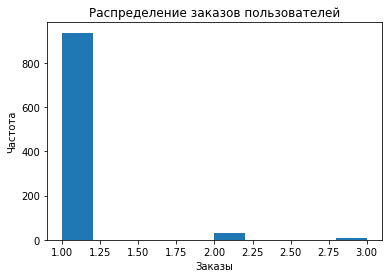

In [40]:
plt.hist(orders_by_users['orders'])
plt.title('Распределение заказов пользователей')
plt.xlabel('Заказы')
plt.ylabel('Частота');

Видно,что большинство пользователей делают 1 заказ.Построим точечный график количества заказов по пользователям

Text(0, 0.5, 'Кол-во заказов')

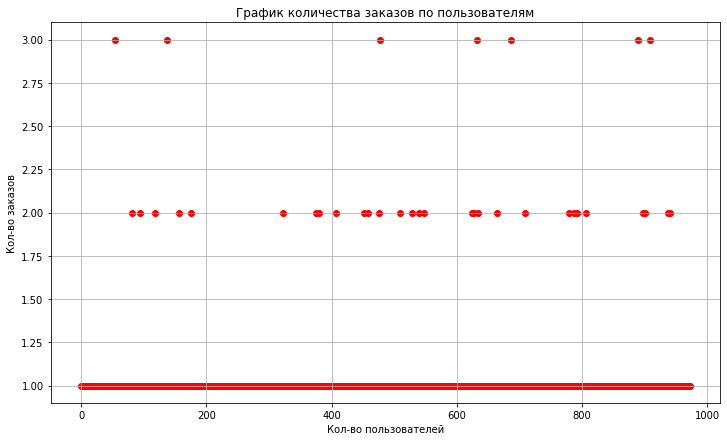

In [41]:
# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders_by_users['orders'],color='red')  
plt.grid()
plt.title('График количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')


**ВЫВОД**

По точечному графику видно,что большиство делает 1 заказ,небольшое количество - 2 заказа и всего 7 человек- 3 заказа

### Расчет  95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [42]:
print('Количество заказов для 5% пользователей:',np.percentile(orders_by_users['orders'], 95))


print('Количество заказов для 1% пользователей:',np.percentile(orders_by_users['orders'],99))



Количество заказов для 5% пользователей: 1.0
Количество заказов для 1% пользователей: 2.0


**ВЫВОД**

- Получается, что 99 процентов пользователей делают от 1 до 2 заказов.

- Выберем  за границу аномальности 99 перцентиль : от 2 заказов

### Построение точечного графика стоимостей заказов.

In [43]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

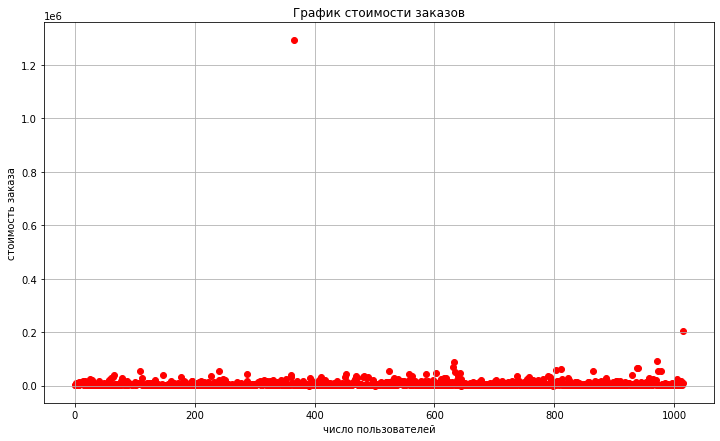

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders['revenue'],color='red')

plt.grid()

plt.xlabel('число пользователей')
plt.ylabel('стоимость заказа')
plt.title('График стоимости заказов');

In [45]:
#Посмотрим точные суммы аномальных заказов.
orders['revenue'].sort_values().tail(10)

131       53904
940       58550
949       60450
1099      65710
1103      66350
743       67990
744       86620
1136      92550
1196     202740
425     1294500
Name: revenue, dtype: int64

Отчетливо видены:  заказ с огромной суммой - 1294500 и второй- 202740. Они и могли вызвать всплески на построеных ранее графиках.
    Посмотрим на график без этих явных выбросов

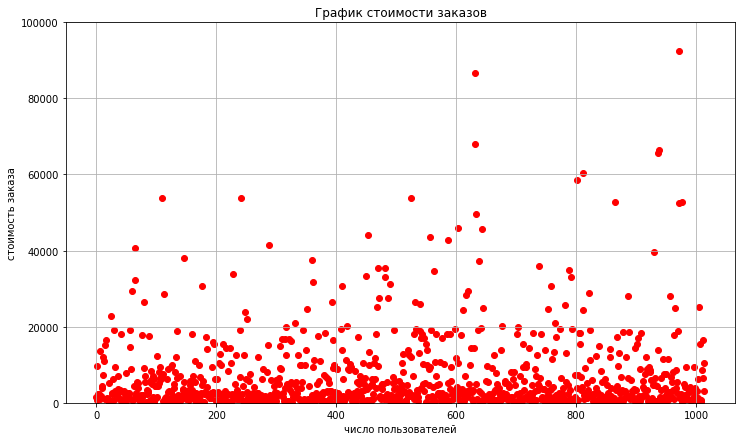

In [46]:

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders['revenue'],color='red')

plt.grid()
plt.ylim(0, 100000)
plt.xlabel('число пользователей')
plt.ylabel('стоимость заказа')
plt.title('График стоимости заказов');

**ВЫВОД**

- В основном заказы в пределах суммы 20000.Как они расрпеделились можно узнать расчиав перцентили

- выявлены аномальные заказы с огромной суммой - 1 294500 и второй- 202740.Они вероятно и быди причиной всплесков на графиках.

### Расчет  95-й и 99-й перцентили стоимости заказов.Выбор границы для определения аномальных заказов.

In [47]:
print('Стоимость заказа для 5% пользователей:',np.percentile(orders['revenue'], 95))

print('Стоимость заказа для 1% пользователей:',np.percentile(orders['revenue'],99))

Стоимость заказа для 5% пользователей: 26785.0
Стоимость заказа для 1% пользователей: 53904.0


**ВЫВОД**

- Не более 5% заказов на сумму свыше 26785 и Не более 1% заказов на сумму свыше 58233 руб - не более 1%. 

- За нижнюю границу можно выбрать стоимость заказа в 26785 (95 перцентиль) и остальные признать аномальными

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Сформулируем гипотезы:**

**H0** - статистически значимых различий в среднем количестве заказов на посетителя  нет

**H1** - статистически значимые различия в среднем количестве заказов на посетителя есть

Критический уровень значимости - 0.05

Метод проверки гипотез - критерий Манна-Уитни(так как данные по среднему числу заказов и среднему чеку не распределены нормально.)


Для расчета статистической значимости различий в среднем количестве заказов на посетителя между группами подготовим данные

In [48]:
# расчет количества пользователей в выбранную дату в группе А
visit_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visit_a_daily.columns = ['date', 'vis_date_a']
                       
# расчет количества пользователей в выбранную дату в группе В
visit_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visit_b_daily.columns = ['date', 'vis_date_b'] 

df_visits = (visit_a_daily.merge(
        visit_b_daily, left_on='date', right_on='date', how='left'))
df_visits.head()

,date,vis_date_a,vis_date_b
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [49]:
# формирование датафреймов в которых указано число совершённых заказов
# для пользователей, которые заказывали хотя бы 1 раз
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

In [50]:
# формирование переменных в которых пользователям с заказами
# будет соответствовать число заказов пользователя,
# а пользователям без заказов — нули
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(
                          df_visits['vis_date_a'].sum() -
                          len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(
                          df_visits['vis_date_b'].sum() -
                          len(orders_by_users_b['orders'])), name='orders')], axis=0)


Расчет статистической значимости различий в среднем количестве заказов на посетителя

In [51]:
alpha = 0.05
p_value = st.mannwhitneyu(sample_a,sample_b)[1]
print("P-value: {0:.3f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост среднего количестве заказов В к А по'cырым' данным: {0:.2%}".format(sample_b.mean() / sample_a.mean()-1))

P-value: 0.011
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост среднего количестве заказов В к А по'cырым' данным: 15.98%


**ВЫВОД**

- В результате проверки гипотез по  критерию Манна-Уитни получено P-value 0.011 < 0.05 , потому **H0** отвергаем.

- Анализ "сырых данных" показывает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия

- Относительный прирост среднего количестве заказов группы `В` к группе `А`: 15.98%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем гипотезы:**

**H0** - статистически значимых различий в среднем чеке между группами нет

**H1** - статистически значимые различия в среднем в среднем чеке между группами есть


Критический уровень значимости - 0.05

Метод проверки гипотез - критерий Манна-Уитни


In [52]:
alpha = 0.05
# рассчет статистической значимости различия среднего чека по результатам теста Манна-Уитни
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1]

print("P-value: {0:.3f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
# рассчет относительного различия в среднем чеке между группами
print('Относительное различие в среднем чеке между группами по «сырым» данным:',
      '{0:.2%}'.format(
          orders[orders['group']=='B']['revenue'].mean()/
          orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.829
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительное различие в среднем чеке между группами по «сырым» данным: 28.66%


**ВЫВОД**

- В результате проверки гипотез по  критерию Манна-Уитни получено P-value 0.829 > 0.05 , потому **H0** не получилось отвергнуть 

- Анализ "сырых данных" показывает, что нет причин отвергать нулевую гипотезу и статистически значимых различий в среднем чеке между группами нет

- Относительное различие в среднем чеке между группами по «сырым» данным: 28.66% в пользу группы `B`


### Расчет статиской  значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Как и предполагалось ранее примем за аномальных пользователей тех, кто совершил более  2 заказов(99 перцентиль)стоимостью
заказа не более  26785 (95 перцентиль).Определим этих пользователей**

**Сформулируем гипотезы зля очищенных данных:**

**H0** - статистически значимых различий в среднем количестве заказов на посетителя  нет

**H1** - статистически значимые различия в среднем количестве заказов на посетителя есть

Критический уровень значимости - 0.05

Метод проверки гипотез - критерий Манна-Уитни
Проверять будем на данных, где не учитываются аномальные пользователи 

Подготовим данные

In [54]:
users_many = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > np.percentile(orders_by_users_a['orders'], 99)]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > np.percentile(orders_by_users_b['orders'],99)]['visitor_id'],],axis=0,)

users_exp = orders[orders['revenue'] >  np.percentile(orders['revenue'], 95)]['visitor_id']

abnormal_users = (pd.concat([users_many,users_exp], axis=0).drop_duplicates().sort_values())
print(abnormal_users.head())
print('Количество аномальных пользователей:', abnormal_users.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
Количество аномальных пользователей: 58


In [55]:
print('Относительные потери пользователей при фильтрации:','{0:.2%}'.
      format(len(abnormal_users)/len(orders['visitor_id'].unique())))

Относительные потери пользователей при фильтрации: 5.96%


Аномальных пользователей обнаружилось **58**, что составляет **5.96%** от общего числа пользователей

In [56]:
# формирование переменных в которых пользователям с заказами будет соответствовать число заказов пользователя,
# а пользователям без заказов — нули.Без учета аномальных пользователей  

sample_a_filt = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))]['orders'], 
                          pd.Series(0, index=np.arange(df_visits['vis_date_a'].sum() - len(orders_by_users_a['orders'])), 
                                    name='orders')], axis=0)
sample_b_filt = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))]['orders'], 
                          pd.Series(0, index=np.arange(df_visits['vis_date_b'].sum() - len(orders_by_users_b['orders'])), 
                                    name='orders')], axis=0)

In [57]:
alpha = 0.05
p_value = st.mannwhitneyu(sample_a_filt,sample_b_filt)[1]
print("P-value: {0:.3f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост среднего количестве заказов В к А по'очищенным' данным: {0:.2%}".format(sample_b_filt.mean() / sample_a_filt.mean()-1))

P-value: 0.012
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост среднего количестве заказов В к А по'очищенным' данным: 18.19%


**ВЫВОД**

- В результате проверки гипотез на 'очищенных' данных по  критерию Манна-Уитни получено P-value 0.012 < 0.05 , потому **H0** отвергаем.

- Анализ "очищенных" данных также  показывает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия

- Относительный прирост среднего количестве заказов группы `В` к группе `А` увеличился и составил: 18.19%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

**Сформулируем гипотезы для очищенных данных:**

**H0** - статистически значимых различий в среднем чеке между группами нет

**H1** - статистически значимые различия в среднем в среднем чеке между группами есть

Критический уровень значимости - 0.05

Метод проверки гипотез - критерий Манна-Уитни

Аномальных пользователей также исключим из рассмотрения

In [58]:
alpha = 0.05
p_value = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'])[1]
print("P-value: {0:.3f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
      ' {0:.2%}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1))

P-value: 0.646
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительное различие в среднем чеке между группами по «очищенным» данным:  -4.85%


**ВЫВОД**


- В результате проверки гипотез на 'очищенных'данных по  критерию Манна-Уитни получено P-value 0.646 > 0.05 , потому **H0** не получилось отвергнуть 

- Анализ 'очищенных' данных показывает, что нет причин отвергать нулевую гипотезу и статистически значимых различий в среднем чеке между группами нет

- Однако относительное различие в среднем чеке между группами по «очищенным» данным: 4.85% в пользу группы `А`.То есть на сумму среднего чека явно раньше влияли слишком дорогие заказы в группе `B`.
    


### Принятие  решения по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

**В результате анализа результатов A/B-теста можно с делать такие краткие выводы:**

- Куммулятивнвя выручка руппы `В` к концу мечяца выше, чем у группы `А`

- К концу месяца наблюдается стабтлизация среднего чека по группам.У группы `В` он выше,хотя и есть небольшая тенденция к понижению.(9000 и 7000 соответственно)

- Кумулятивная выручка группы `В`  выше, чем у группы `А`, но она нестабильна.У группы явно имеются аномальные заказы.
    
- Кумулятивное среднее количество заказов на посетителя у груаппы В выше;В итоге конверсия установились примерно для группы `B` на уровне 0,03, а для группы `A` чуть ниже- 0.02 

- Изменение кумулятивного среднего количества заказов на посетителя группы `B` к группе `A` подожительно к концк месяца и не  падает ниже  10 %

- Стоит отметить,что схожие тендеции для группы `В`  наблюдаются на всех  куммулятивных графиках.

- Анализ и по "сырым" и по "очищенным" данным показывает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия

- Относительный прирост среднего количестве заказов группы `В` к группе `А`  по 'очищенным' данным увеличился и составил: 18.19%
    
- Также  анализ среднего чека и по "сырым" и по "очищенным" выявил,что  статистически значимых различий в среднем чеке между группами нет.Хотя стоит отметить, что относительное различие в среднем чеке между группами по «очищенным» данным: 4.85% в пользу группы `А`.То есть на сумму среднего чека явно раньше влияли слишком дорогие заказы в группе `B`.Но относительное различие в среднем чеке между группами по «сырым» данным: 28.66% в пользу группы B.

- Стоит отметить,что обнаружены пользователи, которые попали и в группу А и в группу B;
  а также пользователи, которые совершили очень дорогие покупки, которые сильно сдвинули значения среднего чека.
  
**В ИТОГЕ: Примем решение остановить тест и зафиксировать победу группы `В`**


## Итоговый вывод

**1.Знакомство и предобработки данных:**

- Выгружены данные и предоставленных трех файлов.Они представляют собой  данные для приоритизации гипотез и результаты проведения А/В теста за период с `01.08.2019 по 31.08.2019.

- в данном случае в А/В тесте две группы- тест парный.Временные рамки теста- календарный месяц`

- Пропусков и явных дубликатов в данных не обнаружено.

- Приведены к нижнему регистру названия столбцов в таблице  **hypothesis** и  переименованы столбцы `transactionId` и `visitorId` в таблице **orders** в соответствии с общепринятыми нормаим.

- Изменен  тип данных в столбцах `date`в таблицах **orders** и **visitors**

- Выявлены неявные дубликаты: Обнаружены 58 пользователей относящихся одновременно к группам `A`
  и `B`.Во избежание ошибок в анализе они удалены
  
**2.Часть 1. Приоритизация гипотез**

- Изучен файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- При применении фреймворка `ICE` определены топ-5 гипотез:

     -  'Запустить акцию, дающую скидку на товар в день рождения'
    
     - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше    пользователей'   
     - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    
     - 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
    
     - 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
     
- При применении фреймворка `RICE` определены топ-5 гипотез:

     - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
     
     - 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
     
     - 'Добавить два новых канала увеличения трафика, что позволит привлекать на 30% больше пользователей'
     
     - 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
     
     - 'Запустить акцию, дающую скидку на товар в день рождения'
     
- Определено, что  при применении `RICE` вместо `ICE` на изменение приоритизации существенное влияние оказывает параметр **Reach(Охват)**.Когда мы добавили этот параметр в расчеты,то мы изменили приоритеты: теперь значимость гипотезы зависит не только от  уверенности в гипотезе,влияния на пользователей,затрат ресурсов на проверку гипотезы , а еще и  от количества пользователей, которых затронет изменение.

**3.Часть 2. Анализ A/B-теста**

**1)Построены**
   - график кумулятивной выручки по группам. Сделайте выводы и предположения.
   - график кумулятивного среднего чека по группам.
   - график относительного изменения кумулятивного среднего чека группы `B` к группе `A`. 
   - график кумулятивного среднего количества заказов на посетителя по группам. 
   - график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
  **На основании анализа графиков были сделаны выводы:**
- Куммулятивнвя выручка руппы `В` к концу мечяца выше, чем у группы `А`

- К концу месяца наблюдается стабтлизация среднего чека по группам.У группы `В` он выше,хотя и есть небольшая тенденция к понижению.(**9000 и 7000 соответственно**)

- Кумулятивная выручка группы `В`  выше, чем у группы `А`, но она нестабильна.У группы явно имеются аномальные заказы.
    
- Кумулятивное среднее количество заказов на посетителя у груаппы В выше;В итоге конверсия установились примерно для группы `B` на уровне **0,03**, а для группы `A` чуть ниже- **0.02** 

- Изменение кумулятивного среднего количества заказов на посетителя группы `B` к группе `A` подожительно к концк месяца и не  падает ниже  10 %
- Стоит отметить,что схожие тендеции для группы `В`  наблюдаются на всех  куммулятивных графиках   

**2)Построены:**
   - точечный график количества заказов по пользователям
   - точечный график стоимостей заказов. Сделайте выводы и предположения.
   - Посчитаны  95-й и 99-й перцентили количества заказов на пользователя
   - Посчитаны 95-й и 99-й перцентили стоимости заказов 
  **В результате на основании графиков и расчетов** 
   - выявлены  заказ с огромной суммой - **1 294500** и второй- **202740**
   - **Определены границы аномальных пользователей: те, кто совершил более  2 заказов(99 перцентиль)стоимостью
     заказа не более  26785 (95 перцентиль)**

**3)Для расчета статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» и  «очищенным» данным, а также статистической значимоси различий в среднем чеке заказа между группами по «сырым» и «очищенным» данным:**
   - Для каждого случая выдвинуты **H0(нулевые) и H1(альтернативные) гипотезы**
   - Установлен критический уровень значимости - 0.05
   - Выбран метод проверки гипотез - критерий Манна-Уитни
   - Подготовлены данные
   - Определены аномальные пользователи - их **58**,что составляет **5.96%** от общего числа пользователей
   - расчитано P-value и относительное различие по рассматриваемым показателям в %
   
**В результате расчетов сделаны выводы**
   
  - Анализ и по "сырым" и по "очищенным" данным показывает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия

- Относительный прирост среднего количестве заказов группы `В` к группе `А`  по 'очищенным' данным увеличился и составил: 18.19%
    
- Также  анализ среднего чека и по "сырым" и по "очищенным" выявил,что  статистически значимых различий в среднем чеке между группами нет.Хотя стоит отметить, что относительное различие в среднем чеке между группами по «очищенным» данным: 4.85% в пользу группы `А`.То есть на сумму среднего чека явно раньше влияли слишком дорогие заказы в группе `B`.Но относительное различие в среднем чеке между группами по «сырым» данным: 28.66% в пользу группы `B`.

- Стоит отметить,что обнаружены пользователи, которые попали и в группу `А` и в группу `B`;
  а также пользователи, которые совершили очень дорогие покупки, которые сильно сдвинули значения среднего чека.
  
**В ИТОГЕ: Принято решение остановить тест и зафиксировать победу группы `В`**


  

